# 张量

张量是一个数据容器。它包含的数据总是数值数据，矩阵是二维张量，向量是一维张量。

张量的**维度**（dimension）通常叫做**轴**（axis）。

## 标量

仅包含一个数字的张量称为**标量**（scalar），也叫做零维张量。

In [2]:
import numpy as np

x = np.array(12)

In [3]:
x

array(12)

In [4]:
x.ndim # 张量的维度（dimension）通常叫做轴（axis）

0

## 向量

数字组成的数组叫做**向量**（vector）或一维张量（1D 张量）。一维张量只有一个轴

In [5]:
X = np.array([12, 3, 6, 14, 7])

In [6]:
X

array([12,  3,  6, 14,  7])

In [7]:
X.ndim

1

## 矩阵

向量组成的数组叫作**矩阵**（matrix）或二维张量（2D 张量）。矩阵有两个轴，对应行和列。

In [8]:
X = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [9]:
X.ndim

2

## 3D 张量

将多个矩阵组合成一个新的数组，可以得到一个 3D 张量。

In [10]:
X = np.array([[[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]]])

In [11]:
X.ndim

3

深度学习一般处理 0D 到 4D 的张量，但处理视频数据可能会遇到 5D 张量。

## 关键属性

张量是由以下三个关键属性定义的：

- 轴的个数（阶）。例如，3D 张量有 3 个轴，矩阵有 2 个轴。在Numpy 库中称为张量的 ndim；
- 形状。这是一个整数元组，表示张量沿着每个轴的维度大小（元素个数）。
- 数据类型，在 Python 中通常叫做 dtype。这个张量所包含数据的类型。例如，张量的类型可以使 float32, uint8, float64 等。

为了具体说明问题，我们看一下 MNIST 例子中处理的数据。首先，加载 MNIST 数据集：

In [12]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


先看看数据维度，即轴的个数，对应 ndim 属性：

In [13]:
print(train_images.ndim)

3


下面是数据的形状：

In [14]:
print(train_images.shape)

(60000, 28, 28)


接着是数据类型，即 dtype 属性；

In [15]:
print(train_images.dtype)

uint8


所以，这里 train_images 是一个由 8 位整数组成的 3D 张量。更确切地说，它是 60,000 个矩阵组成的数组，每个矩阵由 28*28 个整数组成。每个这样的矩阵都是一张灰度图像，元素取值范围为 0~255.

我们用 matplotlib 来显示这个 3D 张量中的第 4 个数字

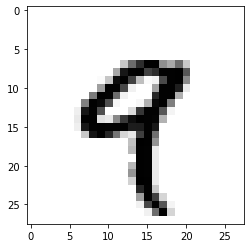

In [16]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## NumPy 中的张量操作

在前面的例子中，我们使用语法 `train_images[i]` 来选择沿第一个轴的特定数字。选择张量的特定元素叫做**张量切片**（tensor slicing）。

下面选择第 10~100 个数字，并将其放在 (90,28,28) 的数组中：

In [17]:
my_slice = train_images[10:100]

In [18]:
print(my_slice.shape)

(90, 28, 28)


它等同于下面这个更复杂的写法，给出切片沿每个张量轴的起始索引和结束索引。这里，`:` 等同于选择整个轴

In [19]:
my_slice = train_images[10:100, :, :] # 等同于上个例子

In [20]:
my_slice.shape

(90, 28, 28)

In [21]:
my_slice = train_images[10:100, 0:28, 0:28] # 也等同于上个例子

In [22]:
my_slice.shape

(90, 28, 28)

一般来说，可以沿着每个张量轴在任意两个索引之间进行选择。例如，可以选择所有图像右下角的 14*14 像素的区域：

In [23]:
my_slice = train_images[:, 14:, 14:]

也可以使用负数索引，与 Python 列表中的负数索引类似，它表示与当前轴终点的相对位置。例如，在图像中心裁剪中 14*14 像素的区域：

In [24]:
my_slice = train_images[:, 7:-7, 7:-7]

In [25]:
my_slice.shape

(60000, 14, 14)

## 批量运算

通常来说，深度学习中所有数据张量的第一个轴（0 轴）都是**样本轴**（sample axis），也称为**样本维度**。在 MNIST 中，样本就是数字图像。

此外，深度学习模型不会同时处理整个数据集，而是将数据才分呈小批量。具体来说，下面是 MNIST 数据集的一个批量，批量大小为 128：

In [26]:
batch = train_images[:128]

然后是下一批

In [27]:
batch = train_images[128: 256]

然后是第 n 个批量。

对于这种批量张量，第一个轴（0 轴）叫作**批量轴**（batch axis）或**批量维度**（batch dimension）。

## 现实世界中的数据张量

我们需要处理的数据几乎都是以下类别之一：

- 向量数据：2D 张量，形状为 （samples, features）；
- 时间序列数据或序列数据：3D 张量，形状为（samples, timesteps, fatures）；
- 图像：4D 张量，形状为 （samples, height, width, channels）或（samples, channels, height, width）;
- 视频：5D 张量，形状为（samples, frames, height, width, channels）或（samples, frames, channels, height, width）

## 向量数据

这是最常见的数据，对于这种数据集，每个数据点都被编码为一个向量，因此一个数据批量就被编码为 2D 张量，其中第一个轴是**样本轴**，第二个轴是**特征轴**。